In [ ]:
!pip install -q tensorflow_decision_forests
!pip install -q tf_keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 34.3 MB/s eta 0:00:00


 Import OS environment variables and other supporting libraries like Pandas, NumPy, TensorFlow and
tensorflow-decision-forests.

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_decision_forests as tfdf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path='/content/drive/MyDrive/Data-RF.xlsx'
df=pd.read_excel('/content/drive/MyDrive/Data-RF.xlsx')

In [ ]:
print(df.head())

   Lab-Test1(30)  Lab-Test2(24)  Midsem Test (90)  Gender Attendance Grade
0          13.00             24              66.0    Male       High     A
1          15.00             24              67.0  Female       High     A
2           5.25             24              45.0    Male       High    B-
3           2.75             19              34.0    Male       High    C-
4           7.25             24              30.0    Male       High    C-


Training decision tree with preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
dfle=df
df['Grade']=le.fit_transform(dfle['Grade'])
dfle

,Lab-Test1(30),Lab-Test2(24),Midsem Test (90),Gender,Attendance,Grade
0,13.00,24,66.0,Male,High,0
1,15.00,24,67.0,Female,High,0
2,5.25,24,45.0,Male,High,3
3,2.75,19,34.0,Male,High,5
4,7.25,24,30.0,Male,High,5
...,...,...,...,...,...,...
495,10.50,24,48.0,Male,Low,3
496,11.00,24,31.0,Female,Moderate,4
497,11.75,24,47.0,Male,High,3
498,0.00,20,0.0,Female,Low,7


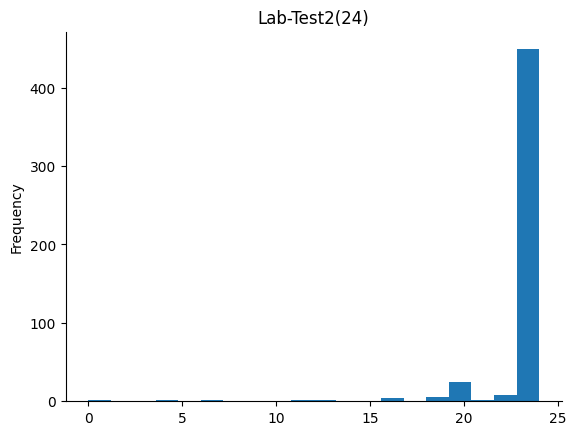

In [ ]:
from matplotlib import pyplot as plt
df['Lab-Test2(24)'].plot(kind='hist', bins=20, title='Lab-Test2(24)')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
le = LabelEncoder()
dfle=df
df['Attendance']=le.fit_transform(dfle['Attendance'])
dfle

,Lab-Test1(30),Lab-Test2(24),Midsem Test (90),Gender,Attendance,Grade
0,13.00,24,66.0,Male,0,0
1,15.00,24,67.0,Female,0,0
2,5.25,24,45.0,Male,0,3
3,2.75,19,34.0,Male,0,5
4,7.25,24,30.0,Male,0,5
...,...,...,...,...,...,...
495,10.50,24,48.0,Male,1,3
496,11.00,24,31.0,Female,2,4
497,11.75,24,47.0,Male,0,3
498,0.00,20,0.0,Female,1,7


In [ ]:
le = LabelEncoder()
dfle=df
df['Gender']=le.fit_transform(dfle['Gender'])
dfle

,Lab-Test1(30),Lab-Test2(24),Midsem Test (90),Gender,Attendance,Grade
0,13.00,24,66.0,2,0,0
1,15.00,24,67.0,0,0,0
2,5.25,24,45.0,2,0,3
3,2.75,19,34.0,2,0,5
4,7.25,24,30.0,2,0,5
...,...,...,...,...,...,...
495,10.50,24,48.0,2,1,3
496,11.00,24,31.0,0,2,4
497,11.75,24,47.0,2,0,3
498,0.00,20,0.0,0,1,7


In [ ]:
X=df.drop(columns=["Grade"])
Y=df.Grade

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [ ]:
import tensorflow_decision_forests as tfdf
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, criterion="entropy")

In [ ]:
dt.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
Y_predict=dt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy=accuracy_score(Y_test,Y_predict)
print(accuracy)

0.58


Training decision tree without preprocessing

In [ ]:
file_path='/content/drive/MyDrive/Data-RF.xlsx'
data=pd.read_excel('/content/drive/MyDrive/Data-RF.xlsx')

In [ ]:
print(data.head())

   Lab-Test1(30)  Lab-Test2(24)  Midsem Test (90)  Gender Attendance Grade
0          13.00             24              66.0    Male       High     A
1          15.00             24              67.0  Female       High     A
2           5.25             24              45.0    Male       High    B-
3           2.75             19              34.0    Male       High    C-
4           7.25             24              30.0    Male       High    C-


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def split_dataset(dataset, test_ratio=0.3):
 test_indices=np.random.rand(len(dataset))< test_ratio
 return dataset[~test_indices],dataset[test_indices]
train_ds_pd, test_ds_pd=split_dataset(data, test_ratio=0.3)

In [ ]:
label='Grade'

In [ ]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label)

In [ ]:
model=tfdf.keras.RandomForestModel()
model.fit(train_ds)

Use /tmp/tmpzp31f3b4 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:06.476274. Found 340 examples.
Training model...
Model trained in 0:00:00.252488
Compiling model...
Model compiled.


In [ ]:
model.make_inspector().evaluation()

Evaluation(num_examples=340, accuracy=0.8382352941176471, loss=0.37679264441077764, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=3)